<a href="https://colab.research.google.com/github/Rameshyab/RagaAI-Catalyst/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



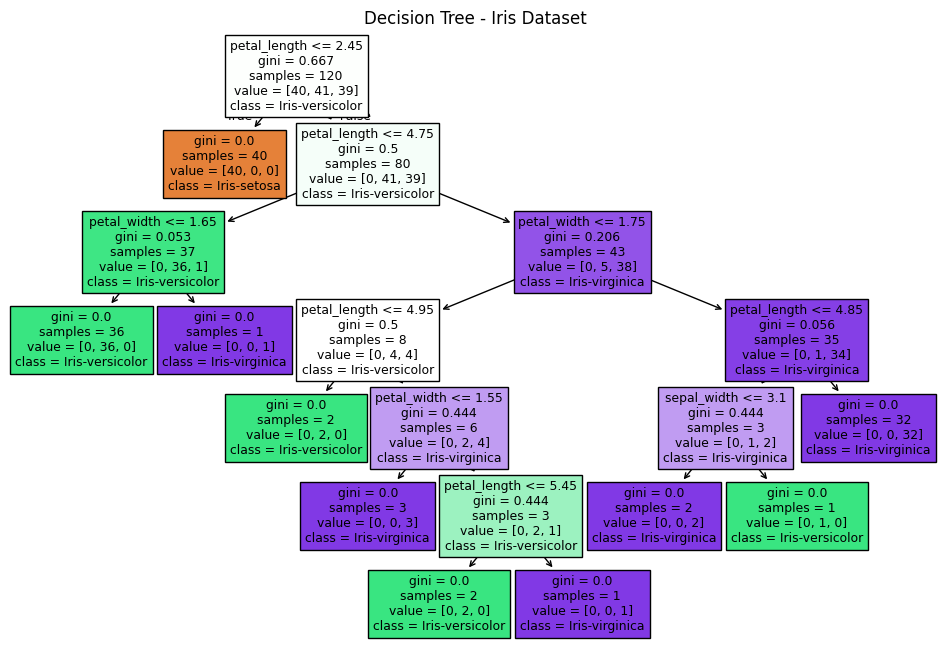

In [1]:
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Extract the zip file
zip_path = "archive.zip"  # Ensure archive.zip is in the same directory
extract_dir = "iris_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Load the CSV file
csv_path = os.path.join(extract_dir, 'IRIS.csv')
df = pd.read_csv(csv_path)

# Step 3: Prepare features and labels
X = df.drop('species', axis=1)
y = df['species']

# Step 4: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 6: Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 7: Make predictions and evaluate
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Step 8: (Optional) Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree - Iris Dataset")
plt.show()
